In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
model = tf.keras.applications.ResNet50(weights='imagenet')


102967424/102967424 [==============================] - 17s 0us/step


In [94]:
img_path = "C:/Users/Shashank/Downloads/IMG20230423121255.jpg"
img_path = "../../../../../Downloads/IMG20220909122751 (1).jpg"


In [95]:
image = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))

In [96]:
image = tf.keras.preprocessing.image.img_to_array(image)

In [97]:
image = np.expand_dims(image, axis=0)

In [98]:
image = tf.keras.applications.resnet50.preprocess_input(image)

In [99]:
epsilon = 0.01  # Adjust the epsilon value to control the perturbation magnitude
loss_object = tf.keras.losses.CategoricalCrossentropy()

In [100]:
#Generate adverserial attack using fgsm

In [101]:
def generate_adv_example(model, input_image, epsilon):
    input_image = tf.cast(input_image, tf.float32)
    with tf.GradientTape() as tape :
        tape.watch(input_image)
        prediction = model(input_image)
        loss = loss_object(original_label, prediction)
        gradient = tape.gradient(loss, input_image)
        signed_grad = tf.sign(gradient)
        adversarial_image = input_image + epsilon * signed_grad
        adversarial_image = tf.clip_by_value(adversarial_image, 0, 255)
    return adversarial_image

In [102]:
original_label = tf.one_hot(935, 1000)  # Example label for "tiger" class in ImageNet
original_label = tf.reshape(original_label, (1, 1000)) 
adversarial_image = generate_adv_example(model, image, epsilon)

In [103]:
original_predictions = model.predict(image)
adversarial_predictions = model.predict(adversarial_image)

1/1 [==============================] - 0s 216ms/step


In [104]:
original_label_index = np.argmax(original_predictions)
adversarial_label_index = np.argmax(adversarial_predictions)

In [105]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


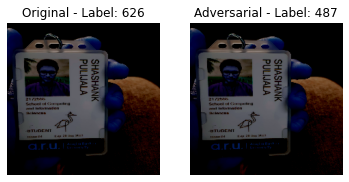

In [106]:
plt.subplot(1, 2, 1)
plt.imshow(image[0] / 255.0)
plt.title('Original - Label: {}'.format(original_label_index))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adversarial_image[0] / 255.0)
plt.title('Adversarial - Label: {}'.format(adversarial_label_index))
plt.axis('off')

plt.show()